# Home price prediction using machine learning 

I am going to start a machine learning project on predicting home prices using multiple linear regression. during our project we will perform
* importing the necessary python libraries
* importing our dataset into jupyer notebook
* next we will perform the upload dataset on some, exploratory data analysis
* Feature engeneering
* data transformation using one-hot encoding
* Data visualization using matplotlib and Seaborn
* Splitting our dataset into training and testing set
* Model training and building
* Model evaluation, looking model score and it is prediction capabilities
* Perfrom K-fold cross validation
* Hyperparameter tuning, finding the best hypyerparameters for our model using GridSearchCV
* Saving our model in our computer as pickle file 

Loading the necessary dependencies or python packages 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

Importing the housing data from my computer in to jupyter notebook using pandas, i have downloaded the data in kaggle.com

In [2]:
df = pd.read_csv('Housing.csv')
# displaying the first six rows of the data
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
# looking the number of columns and rows of the data, we have 545 rows and 13 columns or variables  
df.shape

(545, 13)

In [4]:
# displaying column names 
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

# Feature Engineering
we are going to perfrom feature selection, we drop variable that are not important for house price prediction from our dataset, I drop 5 variables 

In [9]:
# removing variables from the dataset 
df2 = df.drop(['stories', 'mainroad', 'guestroom', 'hotwaterheating', 'furnishingstatus', 'airconditioning', 'parking', 'prefarea'], axis='columns')
# looking how many variales are left 
df2.head()

,price,area,bedrooms,bathrooms,basement
0,13300000,7420,4,2,no
1,12250000,8960,4,4,no
2,12250000,9960,3,2,yes
3,12215000,7500,4,2,yes
4,11410000,7420,4,1,yes


In [10]:
df2.shape

(545, 5)

In [11]:
# inspecting if there is missing values in our dataset 
df2.isnull().sum()

price        0
area         0
bedrooms     0
bathrooms    0
basement     0
dtype: int64

# One-hot encoding 
Next, we perfrom one-hot encoding, is a technique used to represent categorical variables as binary vector. it is used to transfrom categorical variables into numerical variables, so that the machine learning can effecting process and interpret the data 

In [12]:
# load LabelEncoder from sklearn library 
from sklearn.preprocessing import LabelEncoder
# Create an instance of LabelEncoder
le = LabelEncoder()

In [13]:
# Transforming basement, airconditioning and prefarea to binary vector which 0 and 1
df2.basement = le.fit_transform(df2.basement)
df2.head()

,price,area,bedrooms,bathrooms,basement
0,13300000,7420,4,2,0
1,12250000,8960,4,4,0
2,12250000,9960,3,2,1
3,12215000,7500,4,2,1
4,11410000,7420,4,1,1


In [14]:
# perform summary statistics of the dataset 
df2.describe()

,price,area,bedrooms,bathrooms,basement
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,0.350459
std,1.870440e+06,2170.141023,0.738064,0.502470,0.477552
min,1.750000e+06,1650.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,1.000000


# Data Visualization 
we will use matplotlip library for ploting our data, we will examine the distribution of price and area and pairwise plotting of all variables agianst one onother using Seaborn library 

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


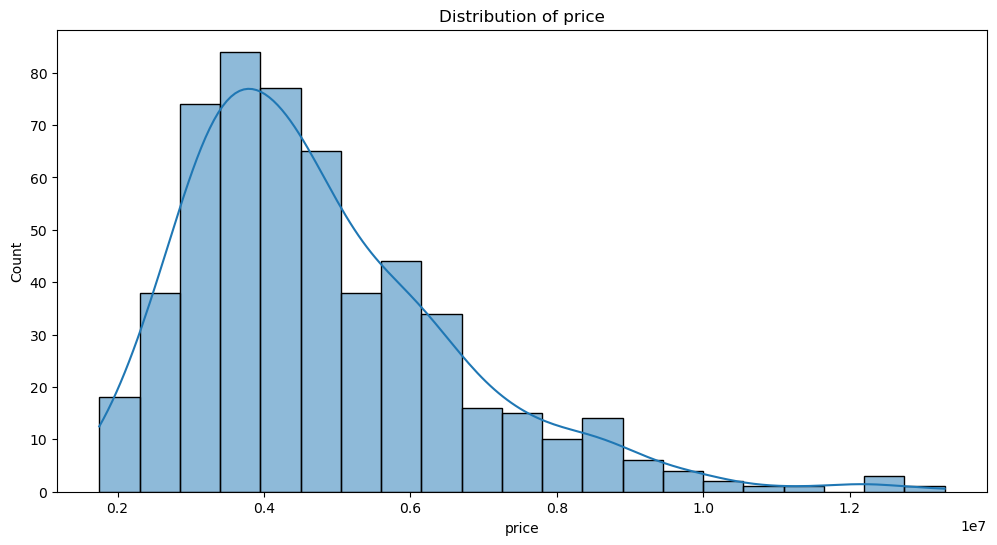

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


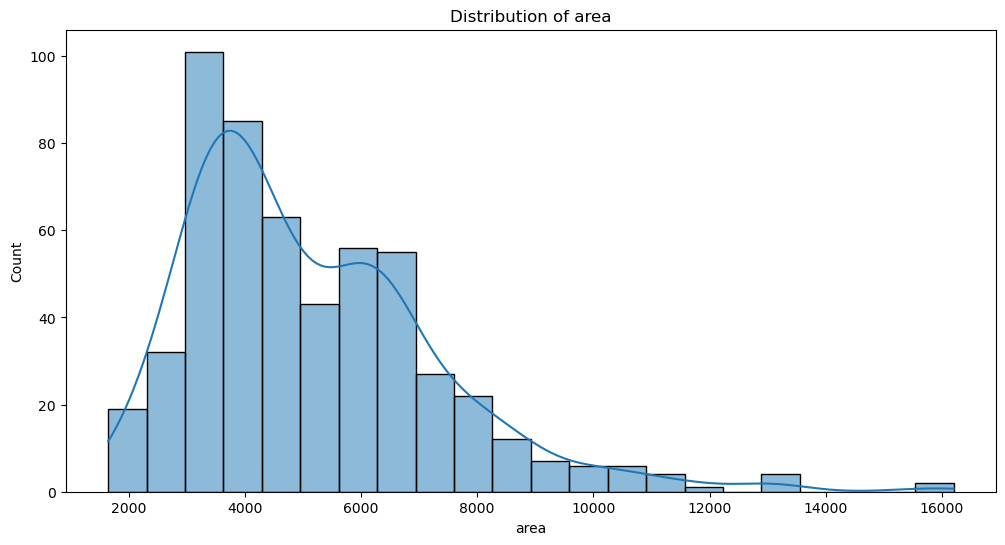

In [15]:
#plotting sale price and examining its distribution
plt.figure(figsize=(12, 6))
sns.histplot(df2['price'], kde = True);
plt.title('Distribution of price')
plt.xlabel('price')
plt.show()
#plotting area and examining its distribution
plt.figure(figsize=(12, 6))
sns.histplot(df2['area'], kde = True);
plt.title('Distribution of area')
plt.xlabel('area')
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

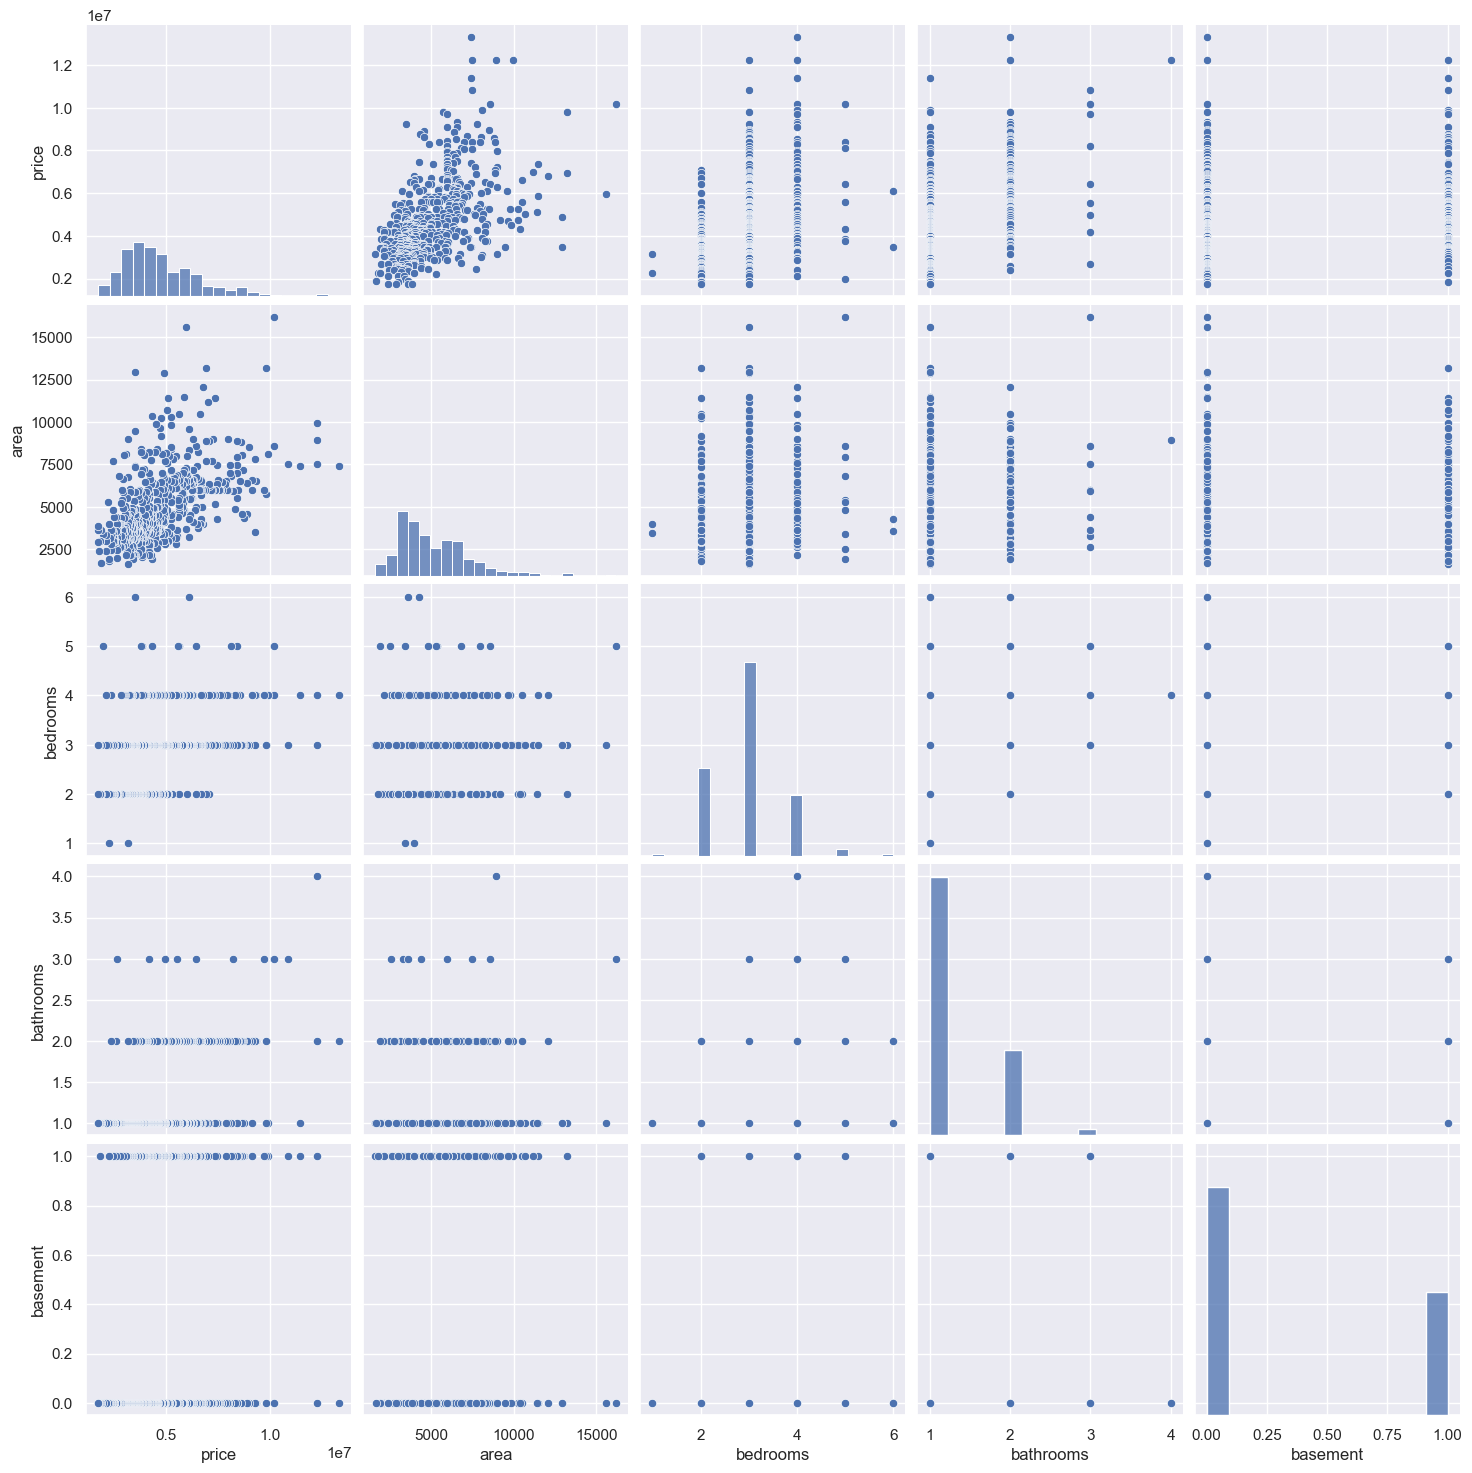

In [16]:
#plotting all features pairwise
sns.set()
cols = ['price', 'area', 'bedrooms', 'bathrooms', 'basement']
sns.pairplot(df2[cols], height = 3)
plt.show();

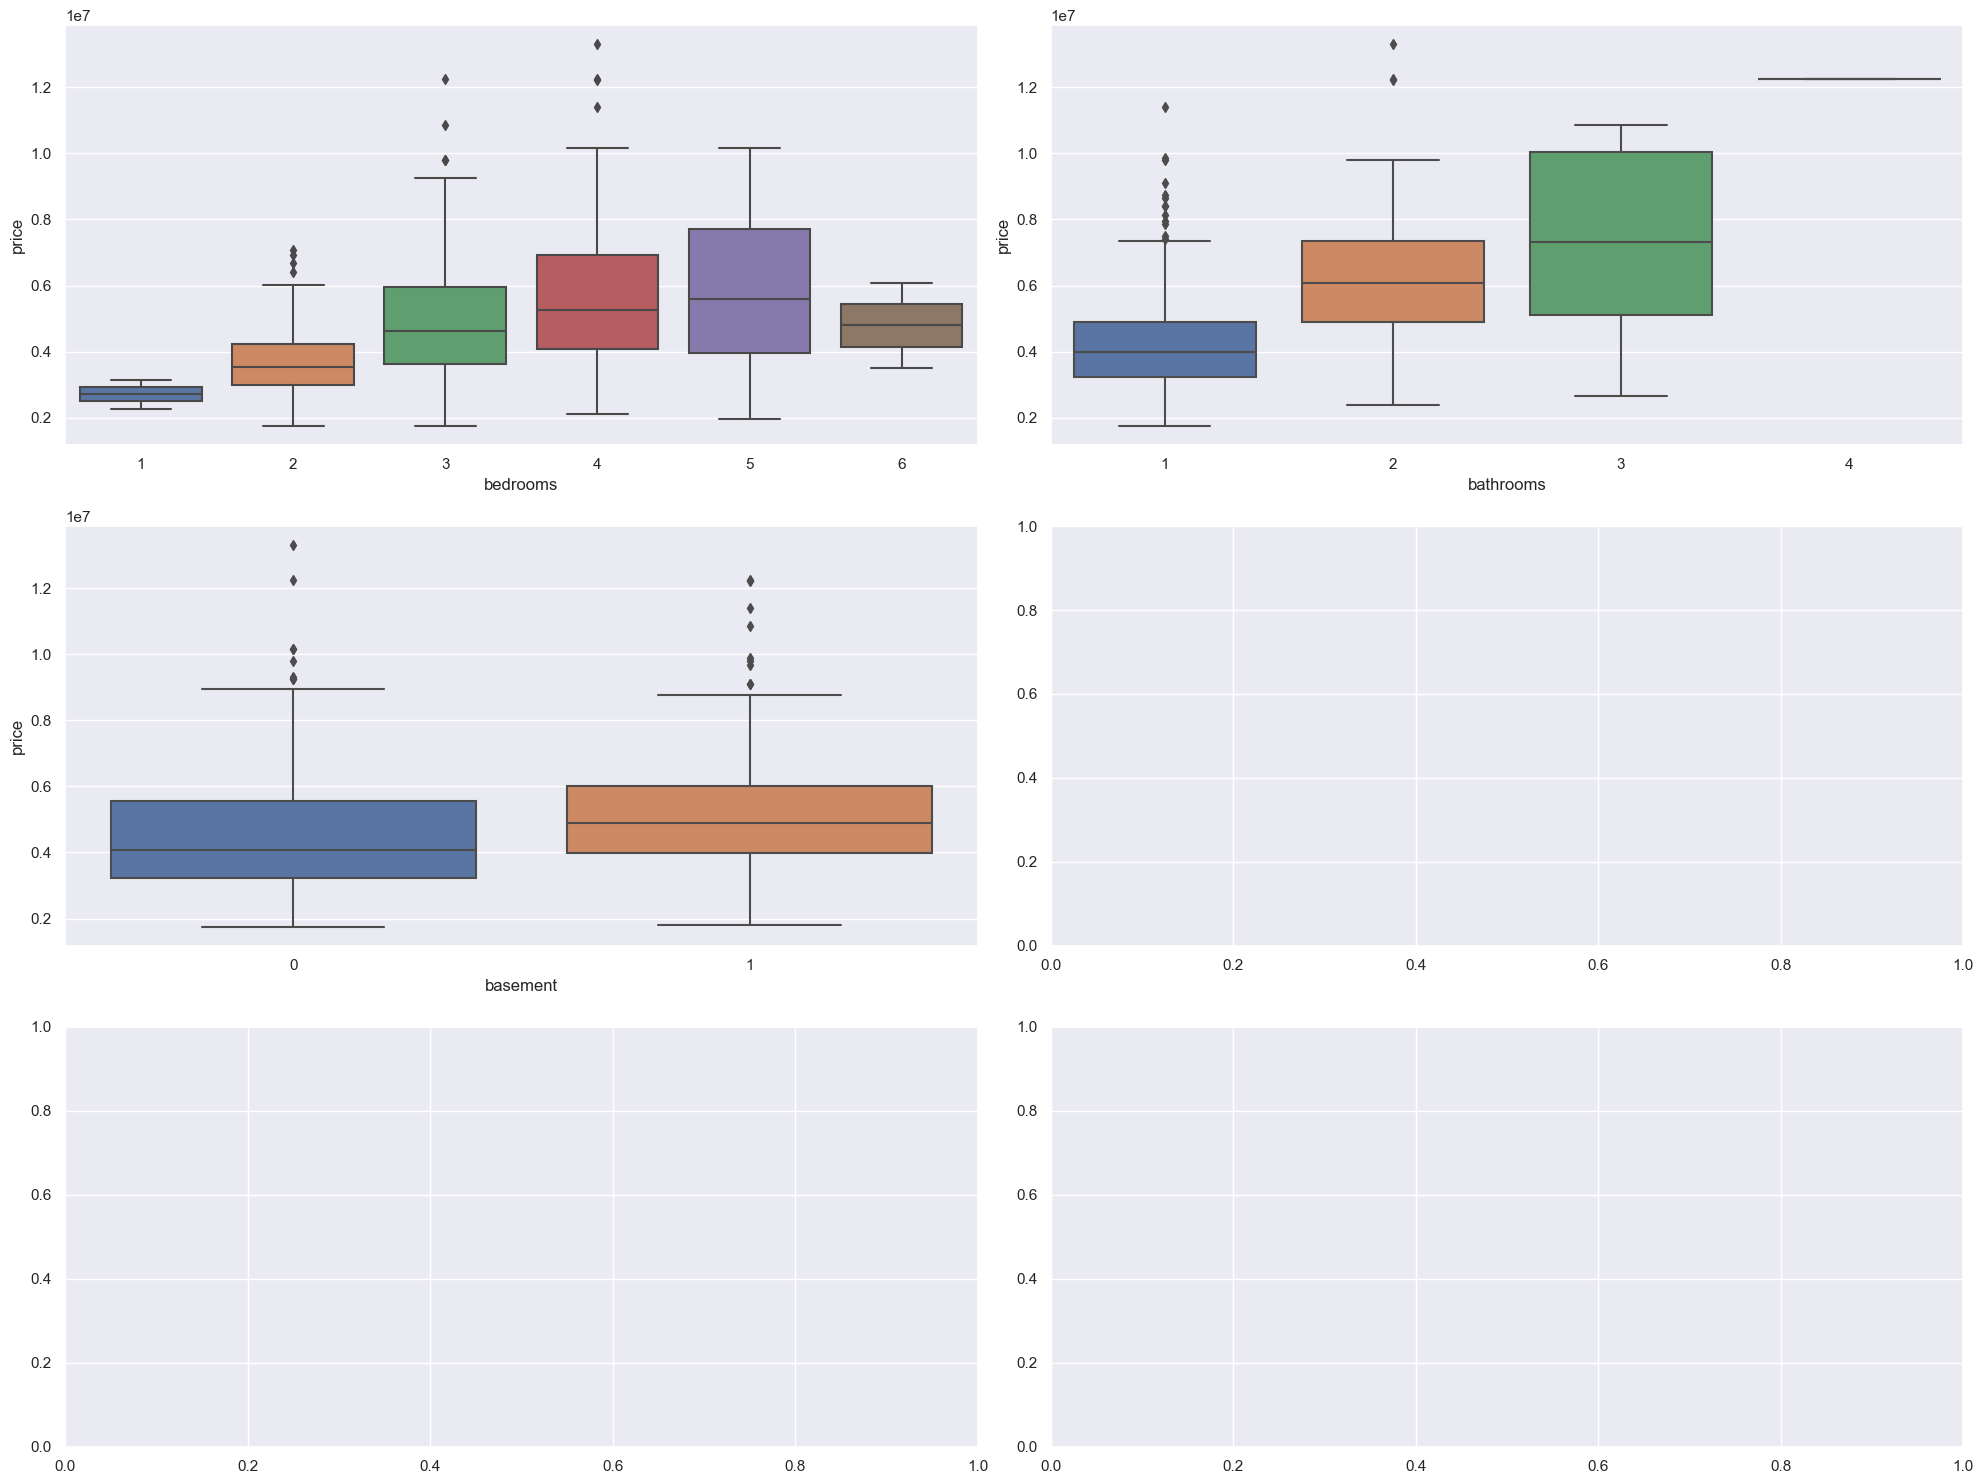

In [17]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15))

sns.boxplot(data=df2, x='bedrooms', y='price', ax=axes[0, 0])
sns.boxplot(data=df2, x='bathrooms', y='price', ax=axes[0, 1])
sns.boxplot(data=df2, x='basement', y='price', ax=axes[1, 0])

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

# Correlation Matrix

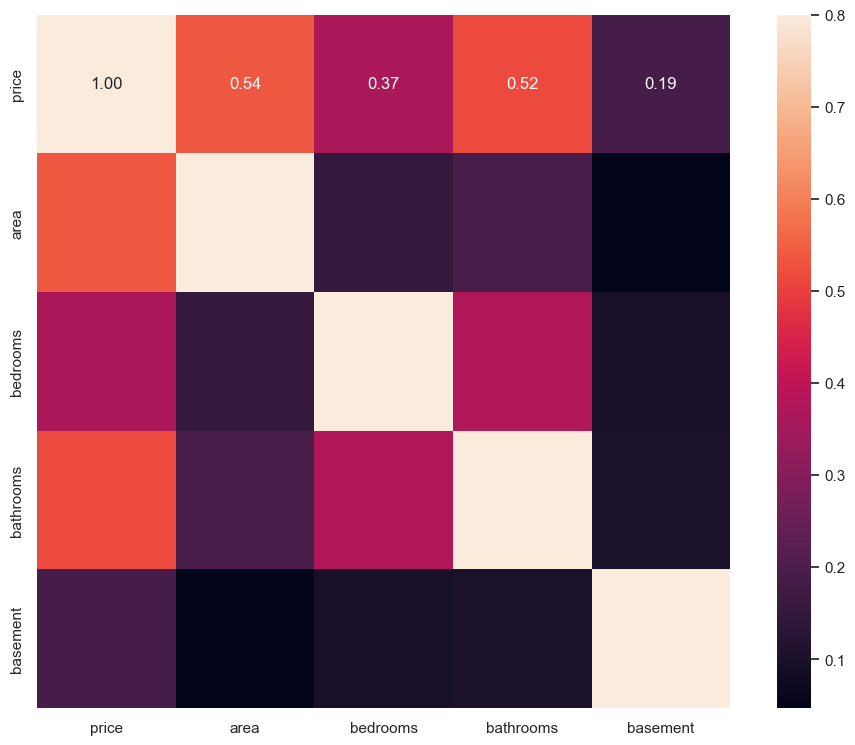

In [18]:
#correlation matrix
corrmatrix = df2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmatrix, vmax=.8, square=True, annot = True, fmt='.2f');

Assigning our dataset in X and Y. Depedent and independent Variables

In [39]:
x = df2.drop(['price', 'basement'], axis='columns')
Y = df2.price

# Split the data into training and testing sets
x_train: training features
x_test: testing features
y_train: training labels
y_test: testing labels
test_size: proportion of the data to be used for testing (in this case, 20%)
random_state: seed value for random shuffling of the data, ensuring reproducibility

In [40]:
# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, random_state=80)

# Model Building 

In [41]:
# Creating LinearRegression Object
lr_model = LinearRegression()

In [42]:
# Train the linear regression model
lr_model.fit(x_train, y_train)

LinearRegression()

In [43]:
# Model score 
lr_model.score(x_test,y_test)

0.5239724172143407

In [44]:
y_pred = lr_model.predict(x_test)

In [45]:
print("Predicted prices:")
print(y_pred)

Predicted prices:
[ 6105936.96980175  6109537.42119373  5259830.89268571  5003895.32192631
  3718534.17498834  3350435.98018187  5799898.60148318  5079864.84629716
  3902157.19597948  4006474.36629937  3764487.89025993  3134408.89666289
  4787868.23840733  4031773.44609087  3339766.68855172  3469250.87611732
  4432275.70342519  5979921.17108234  4247800.52960986  3508855.84142913
  7228974.28217188  3824747.49105184  5775547.59456349  6602495.73996682
  6395773.30685639  3772540.94586809  4236147.02260972  4276604.14074572
  4144239.59206654  3201017.24741457  5834747.44065023  4752223.76962669
  6038380.54617825  5374741.81530057  4858077.040551    3916559.00154741
  5979921.17108234  3428205.73024871  7006901.97062171  4960689.90522252
  3988568.02938707  3494454.0358612   3404442.75106162  5501913.28877277
  5126614.19118234  3264025.14677428  3743737.33473222  5673882.80276377
  7482161.55436348  3508855.84142913  5306636.76078149  3201017.24741457
  5230799.29895644  4878731.67603

# K Fold cross validation
Use K Fold cross validation to measure accuracy of our LinearRegression model

In [46]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x, Y, cv=cv)

array([0.47740788, 0.5107298 , 0.51921959, 0.29573505, 0.4899454 ])

We will perform GridSearchCV, a class provided by scikit-learn that performs an exhaustive search over a specified parameter grid to find the best combination of hyperparameters for our linearregression model.

In [47]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, ShuffleSplit
import pandas as pd

In [48]:
def find_best_model_using_gridsearchcv(X, Y):
    algos = {
        'Linear Regression': {
            'model': LinearRegression(),
            'params': {
                'copy_X': [True, False],
                'fit_intercept': [True, False],
                'n_jobs': [1, -1],
                'positive': [True, False]
            }
        }
    }
    
    scores = []
    cv = 5  # Number of cross-validation folds
    
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, Y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(x, Y)

,model,best_score,best_params
0,Linear Regression,-12.494198,"{'copy_X': True, 'fit_intercept': False, 'n_jo..."


# Saving our model as pickle file, so we can use it later for model deployment in production envrionment 

In [49]:
import pickle

with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(lr_model, file)


#  Export location and column information to a file that will be useful later on in our prediction application

In [50]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [51]:
x.columns

Index(['area', 'bedrooms', 'bathrooms'], dtype='object')